In [1]:
import os
os.getcwd()

'/Users/kaimihuang/Documents/GitHub/Fitbit'

In [10]:
from glob import glob
glob('./Fitbit/*')
#data downloaded from Fitbit app
#target: sleep score
#input: deep_sleep_in_minutes, resting_heart_rate, restlessness

['./Fitbit/Daily Readiness',
 './Fitbit/Sleep Score',
 './Fitbit/Menstrual Health',
 './Fitbit/Biometrics',
 './Fitbit/Guided Programs',
 './Fitbit/Journal Log',
 './Fitbit/Oxygen Saturation (SpO2)',
 './Fitbit/Account Changes',
 './Fitbit/Discover',
 './Fitbit/Fitbit Care or Programs',
 './Fitbit/Heart Rate Variability',
 './Fitbit/Paired Devices',
 './Fitbit/Stress Journal',
 './Fitbit/Snore and Noise Detect',
 './Fitbit/Social',
 './Fitbit/Activity Goals',
 './Fitbit/Transactions',
 './Fitbit/Active Zone Minutes (AZM)',
 './Fitbit/Global Export Data',
 './Fitbit/Fitbit Premium',
 './Fitbit/Heart Rate',
 './Fitbit/Temperature',
 './Fitbit/User Security Data',
 './Fitbit/Your Profile',
 './Fitbit/Stress Score']

In [11]:
glob('./Fitbit/Sleep Score/*')

['./Fitbit/Sleep Score/sleep_score.csv']

In [13]:
glob('./Fitbit/Stress Score/*')

['./Fitbit/Stress Score/Stress Score.csv',
 './Fitbit/Stress Score/Stress Score Readme.txt']

In [193]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [99]:
sleep_score_df = pd.read_csv('./Fitbit/Sleep Score/sleep_score.csv')
sleep_score_df.head()

,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,43994420108,2023-12-30T08:25:30Z,82,NaN,82,NaN,62,56,0.050505
1,43984530476,2023-12-29T08:07:00Z,81,NaN,81,NaN,61,55,0.068249
2,43972352505,2023-12-28T08:10:30Z,78,NaN,78,NaN,64,57,0.063509
3,43952349702,2023-12-26T10:04:00Z,84,NaN,84,NaN,58,58,0.048860
4,43940484767,2023-12-25T09:50:00Z,89,NaN,89,NaN,100,59,0.053800


In [100]:
sleep_score_df.shape

(98, 9)

In [101]:
sleep_score_df.isnull().sum(axis=0)

sleep_log_entry_id        0
timestamp                 0
overall_score             0
composition_score        98
revitalization_score      0
duration_score           98
deep_sleep_in_minutes     0
resting_heart_rate        0
restlessness              0
dtype: int64

In [102]:
(sleep_score_df.overall_score == sleep_score_df.revitalization_score).sum()==sleep_score_df.shape[0]

True

In [103]:
sleep_score_df.dropna(axis=1,inplace=True)
sleep_score_df.drop(columns = ['revitalization_score'],inplace=True)

timestamp = pd.to_datetime(sleep_score_df.timestamp,format = 'ISO8601')
sleep_score_df.timestamp = timestamp.apply(lambda x: np.datetime64(x).astype('datetime64[D]'))

sleep_score_df.info()
sleep_score_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sleep_log_entry_id     98 non-null     int64         
 1   timestamp              98 non-null     datetime64[ns]
 2   overall_score          98 non-null     int64         
 3   deep_sleep_in_minutes  98 non-null     int64         
 4   resting_heart_rate     98 non-null     int64         
 5   restlessness           98 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 4.7 KB


/var/folders/6t/qq3z1qdx60s0sj_h80x_2wz40000gn/T/ipykernel_12678/55414505.py:5: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  sleep_score_df.timestamp = timestamp.apply(lambda x: np.datetime64(x).astype('datetime64[D]'))


,sleep_log_entry_id,timestamp,overall_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,43994420108,2023-12-30,82,62,56,0.050505
1,43984530476,2023-12-29,81,61,55,0.068249
2,43972352505,2023-12-28,78,64,57,0.063509
3,43952349702,2023-12-26,84,58,58,0.048860
4,43940484767,2023-12-25,89,100,59,0.053800


In [201]:
sleep_score_df.overall_score.describe()

count    98.000000
mean     79.806122
std       6.582793
min      56.000000
25%      77.250000
50%      81.000000
75%      84.000000
max      91.000000
Name: overall_score, dtype: float64

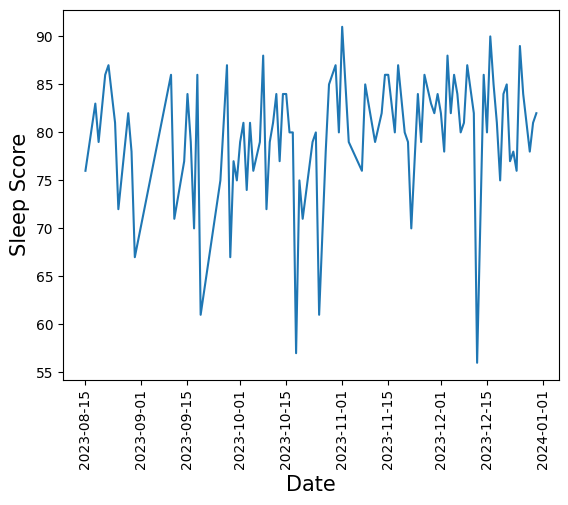

In [199]:
plt.plot(pd.to_datetime(sleep_score_df['timestamp']), sleep_score_df['overall_score']) # line plot
plt.xlabel('Date', fontsize=15)
plt.ylabel('Sleep Score', fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [210]:
stress_score_df = pd.read_csv('./Fitbit/Stress Score/Stress Score.csv')
stress_score_df.head()

,DATE,UPDATED_AT,STRESS_SCORE,SLEEP_POINTS,MAX_SLEEP_POINTS,RESPONSIVENESS_POINTS,MAX_RESPONSIVENESS_POINTS,EXERTION_POINTS,MAX_EXERTION_POINTS,STATUS,CALCULATION_FAILED
0,2023-08-15T00:00:00,2023-08-15T13:02:33.14,0,0,0,0,0,0,0,NO_DATA,True
1,2023-08-18T00:00:00,2023-08-18T11:59:44.35,0,0,0,0,0,0,0,NO_DATA,True
2,2023-08-19T00:00:00,2023-08-19T12:08:10.217,74,0,0,0,0,0,0,READY_NOT_PREMIUM,False
3,2023-08-21T00:00:00,2023-08-21T15:41:46.888,0,0,0,0,0,0,0,NO_DATA,True
4,2023-08-22T00:00:00,2023-08-22T13:09:13.342,80,0,0,0,0,0,0,READY_NOT_PREMIUM,False


In [211]:
(stress_score_df.CALCULATION_FAILED == False).sum()
#should i include stress score in the model since there are only few scores??

27

In [212]:
stress_score_df[stress_score_df.CALCULATION_FAILED == False].STRESS_SCORE.describe()
#high score = more stress

count    27.000000
mean     71.740741
std       7.638932
min      57.000000
25%      65.000000
50%      73.000000
75%      76.500000
max      87.000000
Name: STRESS_SCORE, dtype: float64

In [214]:
timestamp = pd.to_datetime(stress_score_df.UPDATED_AT,format = 'ISO8601')
stress_score_df.UPDATED_AT = timestamp.apply(lambda x: np.datetime64(x).astype('datetime64[D]'))

stress_score_df = stress_score_df[['UPDATED_AT','STRESS_SCORE']]
stress_score_df.rename(columns={'UPDATED_AT':'timestamp'},inplace=True)
stress_score_df.head()

,timestamp,STRESS_SCORE
0,2023-08-15,0
1,2023-08-18,0
2,2023-08-19,74
3,2023-08-21,0
4,2023-08-22,80


In [107]:
glob('./Fitbit/Temperature/Computed Temperature*')

['./Fitbit/Temperature/Computed Temperature - 2023-08-13.csv',
 './Fitbit/Temperature/Computed Temperature - 2023-10-01.csv',
 './Fitbit/Temperature/Computed Temperature - 2023-12-01.csv',
 './Fitbit/Temperature/Computed Temperature - 2023-09-01.csv',
 './Fitbit/Temperature/Computed Temperature - 2023-11-01.csv']

In [109]:
temp_aug_df = pd.read_csv('./Fitbit/Temperature/Computed Temperature - 2023-08-13.csv')
temp_sept_df = pd.read_csv('./Fitbit/Temperature/Computed Temperature - 2023-09-01.csv')
temp_oct_df = pd.read_csv('./Fitbit/Temperature/Computed Temperature - 2023-10-01.csv')
temp_nov_df = pd.read_csv('./Fitbit/Temperature/Computed Temperature - 2023-11-01.csv')
temp_dec_df = pd.read_csv('./Fitbit/Temperature/Computed Temperature - 2023-12-01.csv')
temp_df = pd.concat([temp_aug_df, temp_sept_df, temp_oct_df, temp_nov_df, temp_dec_df])
temp_df.head()

,type,sleep_start,sleep_end,temperature_samples,nightly_temperature,baseline_relative_sample_sum,baseline_relative_sample_sum_of_squares,baseline_relative_nightly_standard_deviation,baseline_relative_sample_standard_deviation
0,IDT,2023-08-14T23:55,2023-08-15T06:59,424,33.409434,NaN,NaN,NaN,NaN
1,IDT,2023-08-17T23:07:30,2023-08-18T07:58:30,519,33.860116,NaN,NaN,NaN,NaN
2,IDT,2023-08-19T00:27,2023-08-19T08:07:30,456,32.891667,-236.101887,832.154169,0.484612,1.249095
3,IDT,2023-08-21T00:12:30,2023-08-21T08:07:30,475,33.792211,90.909434,86.300179,0.444522,0.981447
4,IDT,2023-08-21T23:51,2023-08-22T09:08:30,553,33.677577,0.000000,287.381953,0.394158,0.896397


In [113]:
temp_df.isnull().sum(axis=0)

type                                            0
sleep_start                                     0
sleep_end                                       0
temperature_samples                             0
nightly_temperature                             0
baseline_relative_sample_sum                    2
baseline_relative_sample_sum_of_squares         2
baseline_relative_nightly_standard_deviation    2
baseline_relative_sample_standard_deviation     2
dtype: int64

In [118]:
sleep_end = pd.to_datetime(temp_df.sleep_end,format = 'ISO8601')
temp_df.sleep_end = sleep_end.apply(lambda x: np.datetime64(x).astype('datetime64[D]'))
temp_df = temp_df[['sleep_end','nightly_temperature']]
temp_df.head()

,sleep_end,nightly_temperature
0,2023-08-15,33.409434
1,2023-08-18,33.860116
2,2023-08-19,32.891667
3,2023-08-21,33.792211
4,2023-08-22,33.677577


In [120]:
glob('./Fitbit/Heart Rate Variability/*')

['./Fitbit/Heart Rate Variability/Daily Heart Rate Variability Summary - 2023-10-(13).csv',
 './Fitbit/Heart Rate Variability/Daily Heart Rate Variability Summary - 2023-11-(13).csv',
 './Fitbit/Heart Rate Variability/Daily Heart Rate Variability Summary - 2023-09-(9).csv',
 './Fitbit/Heart Rate Variability/Heart Rate Variability Details - 2023-12-24.csv',
 './Fitbit/Heart Rate Variability/Daily Respiratory Rate Summary README.txt',
 './Fitbit/Heart Rate Variability/Daily Respiratory Rate Summary - 2023-12-07.csv',
 './Fitbit/Heart Rate Variability/Heart Rate Variability Details - 2023-12-18.csv',
 './Fitbit/Heart Rate Variability/Heart Rate Variability Details - 2023-10-09.csv',
 './Fitbit/Heart Rate Variability/Daily Respiratory Rate Summary - 2023-10-02.csv',
 './Fitbit/Heart Rate Variability/Daily Respiratory Rate Summary - 2023-10-16.csv',
 './Fitbit/Heart Rate Variability/Heart Rate Variability Details - 2023-09-14.csv',
 './Fitbit/Heart Rate Variability/Heart Rate Variability De

In [ ]:
# Heart rate variability (HRV) is the physiological phenomenon of variation in the time interval between heartbeats. It is measured by the variation in the beat-to-beat interval.

# The "Daily Heart Rate Variability Summary" files include daily granularity recordings of your HRV during a sleep. The description for the values of each row is as follows:

# rmssd: Root mean squared value of the successive differences of time interval between successive heart beats., measured during sleep.
# nremhr:  Heart rate measured during non-REM sleep (i.e. light and deep sleep stages).
# entropy:  Entropy quantifies randomness or disorder in a system. High entropy indicates high HRV. Entropy is measured from the histogram of time interval between successive heart beats values measured during sleep.

In [ ]:
# The respiratory rate (or breathing rate) is the rate at which breathing occurs. This is usually measured in breaths per minute.

# The "Daily Respiration Rate Summary" files include daily granularity recordings of your Respiratory Rate during a sleep. The description is as follows:

# daily_respiratory_rate: Breathing rate average estimated from deep sleep when possible, and from light sleep when deep sleep data is not available.

In [130]:
hrv_summaries = glob('./Fitbit/Heart Rate Variability/Daily Heart Rate Variability Summary -*')
rr_summaries = glob('./Fitbit/Heart Rate Variability/Daily Respiratory Rate Summary -*')

In [131]:
pd.read_csv('./Fitbit/Heart Rate Variability/Daily Heart Rate Variability Summary - 2023-10-(13).csv')

,timestamp,rmssd,nremhr,entropy
0,2023-10-14T00:00:00,36.49,61.159,2.854


In [136]:
pd.read_csv('./Fitbit/Heart Rate Variability/Daily Respiratory Rate Summary - 2023-12-12.csv')

,timestamp,daily_respiratory_rate
0,2023-12-12T00:00:00,16.4


In [162]:
for ind, csv in enumerate(hrv_summaries):
    if ind == 0:
        hrv_df = pd.read_csv(csv)
    else:
        placeholder_df = pd.read_csv(csv)
        hrv_df = pd.concat([hrv_df,placeholder_df])

In [163]:
hrv_df.sort_values('timestamp', ascending=False, inplace=True)

timestamp = pd.to_datetime(hrv_df.timestamp,format = 'ISO8601')
hrv_df.timestamp = timestamp.apply(lambda x: np.datetime64(x).astype('datetime64[D]'))

hrv_df

,timestamp,rmssd,nremhr,entropy
0,2023-12-29,49.781,53.923,2.882
0,2023-12-28,55.029,51.324,2.844
0,2023-12-26,50.182,51.438,2.608
0,2023-12-25,54.733,54.853,2.932
0,2023-12-24,67.538,57.688,2.915
...,...,...,...,...
0,2023-08-22,56.928,53.218,2.726
0,2023-08-21,44.339,53.531,2.503
0,2023-08-19,52.057,53.719,2.737
0,2023-08-18,57.489,49.969,2.931


In [150]:
for ind, csv in enumerate(rr_summaries):
    if ind == 0:
        rr_df = pd.read_csv(csv)
    else:
        placeholder_df = pd.read_csv(csv)
        rr_df = pd.concat([rr_df,placeholder_df])

In [165]:
rr_df.sort_values('timestamp', ascending=False, inplace=True)

timestamp = pd.to_datetime(rr_df.timestamp, format = 'ISO8601')
rr_df.timestamp = timestamp.apply(lambda x: np.datetime64(x).astype('datetime64[D]'))

rr_df

,timestamp,daily_respiratory_rate
0,2023-12-29,17.4
0,2023-12-28,17.6
0,2023-12-26,18.0
0,2023-12-25,17.4
0,2023-12-24,18.8
...,...,...
0,2023-08-22,19.0
0,2023-08-21,18.8
0,2023-08-19,18.6
0,2023-08-18,18.6


In [157]:
glob('./Fitbit/Active Zone Minutes (AZM)/*')

['./Fitbit/Active Zone Minutes (AZM)/Active Zone Minutes - 2023-08-13.csv',
 './Fitbit/Active Zone Minutes (AZM)/Active Zone Minutes - 2023-12-01.csv',
 './Fitbit/Active Zone Minutes (AZM)/Active Zone Minutes - 2023-10-01.csv',
 './Fitbit/Active Zone Minutes (AZM)/Active Zone Minutes - 2023-09-01.csv',
 './Fitbit/Active Zone Minutes (AZM)/Active Zone Minutes - 2023-11-01.csv']

In [234]:
azm = glob('./Fitbit/Active Zone Minutes (AZM)/*')

In [235]:
for ind, csv in enumerate(azm):
    if ind == 0:
        azm_df = pd.read_csv(csv)
    else:
        placeholder_df = pd.read_csv(csv)
        azm_df = pd.concat([azm_df,placeholder_df])

In [236]:
azm_df

,date_time,heart_zone_id,total_minutes
0,2023-08-13T10:23,FAT_BURN,1
1,2023-08-13T10:29,FAT_BURN,1
2,2023-08-13T10:30,FAT_BURN,1
3,2023-08-13T10:31,FAT_BURN,1
4,2023-08-13T12:15,FAT_BURN,1
...,...,...,...
515,2023-11-29T14:47,FAT_BURN,1
516,2023-11-29T14:48,FAT_BURN,1
517,2023-11-29T14:49,FAT_BURN,1
518,2023-11-29T14:50,FAT_BURN,1


In [237]:
date_time = pd.to_datetime(azm_df.date_time,format='ISO8601')
azm_df.date_time = date_time.apply(lambda x: np.datetime64(x).astype('datetime64[D]'))
azm_df

,date_time,heart_zone_id,total_minutes
0,2023-08-13,FAT_BURN,1
1,2023-08-13,FAT_BURN,1
2,2023-08-13,FAT_BURN,1
3,2023-08-13,FAT_BURN,1
4,2023-08-13,FAT_BURN,1
...,...,...,...
515,2023-11-29,FAT_BURN,1
516,2023-11-29,FAT_BURN,1
517,2023-11-29,FAT_BURN,1
518,2023-11-29,FAT_BURN,1


In [238]:
azm_df = azm_df.groupby('date_time').agg('sum')
azm_df.drop(columns=['heart_zone_id'],inplace=True)
azm_df.head()

,total_minutes
date_time,
2023-08-13,237
2023-08-14,17
2023-08-15,108
2023-08-17,1
2023-08-18,216


In [239]:
#merge all dfs
sleep_score_df.head()

,sleep_log_entry_id,timestamp,overall_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,43994420108,2023-12-30,82,62,56,0.050505
1,43984530476,2023-12-29,81,61,55,0.068249
2,43972352505,2023-12-28,78,64,57,0.063509
3,43952349702,2023-12-26,84,58,58,0.048860
4,43940484767,2023-12-25,89,100,59,0.053800


In [209]:
stress_score_df.head()

,UPDATED_AT,STRESS_SCORE
0,2023-08-15,0
1,2023-08-18,0
2,2023-08-19,74
3,2023-08-21,0
4,2023-08-22,80


In [225]:
temp_df.head()

,sleep_end,nightly_temperature
0,2023-08-15,33.409434
1,2023-08-18,33.860116
2,2023-08-19,32.891667
3,2023-08-21,33.792211
4,2023-08-22,33.677577


In [289]:
final_df = pd.merge(sleep_score_df,stress_score_df,how='outer',on='timestamp').merge(temp_df,how='outer',left_on='timestamp',right_on='sleep_end').merge(hrv_df,how='outer',on='timestamp').merge(rr_df,how='outer',on='timestamp').merge(azm_df,how='outer',left_on='timestamp',right_on='date_time')

In [290]:
final_df.columns

Index(['sleep_log_entry_id', 'timestamp', 'overall_score',
       'deep_sleep_in_minutes', 'resting_heart_rate', 'restlessness',
       'STRESS_SCORE', 'sleep_end', 'nightly_temperature', 'rmssd', 'nremhr',
       'entropy', 'daily_respiratory_rate', 'total_minutes'],
      dtype='object')

In [291]:
final_df.drop(columns=['STRESS_SCORE','sleep_log_entry_id','sleep_end'],inplace=True)
final_df.rename(columns={'total_minutes':'total_active_zone_minutes'},inplace=True)
final_df

,timestamp,overall_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,nightly_temperature,rmssd,nremhr,entropy,daily_respiratory_rate,total_active_zone_minutes
0,2023-12-30,82.0,62.0,56.0,0.050505,34.147345,NaN,NaN,NaN,NaN,NaN
1,2023-12-29,81.0,61.0,55.0,0.068249,33.895000,49.781,53.923,2.882,17.4,139.0
2,2023-12-28,78.0,64.0,57.0,0.063509,33.318750,55.029,51.324,2.844,17.6,42.0
3,2023-12-26,84.0,58.0,58.0,0.048860,34.514225,50.182,51.438,2.608,18.0,NaN
4,2023-12-25,89.0,100.0,59.0,0.053800,33.783618,54.733,54.853,2.932,17.4,35.0
...,...,...,...,...,...,...,...,...,...,...,...
116,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
117,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
118,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
119,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0


In [292]:
final_df[final_df.isnull().sum(axis=1)==final_df.shape[1]-1]

,timestamp,overall_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,nightly_temperature,rmssd,nremhr,entropy,daily_respiratory_rate,total_active_zone_minutes
109,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237.0
110,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0
111,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
112,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
113,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0
114,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.0
115,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0
116,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
117,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
118,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [293]:
final_df = final_df[final_df.isnull().sum(axis=1)!=final_df.shape[1]-1]

In [294]:
final_df

,timestamp,overall_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,nightly_temperature,rmssd,nremhr,entropy,daily_respiratory_rate,total_active_zone_minutes
0,2023-12-30,82.0,62.0,56.0,0.050505,34.147345,NaN,NaN,NaN,NaN,NaN
1,2023-12-29,81.0,61.0,55.0,0.068249,33.895000,49.781,53.923,2.882,17.4,139.0
2,2023-12-28,78.0,64.0,57.0,0.063509,33.318750,55.029,51.324,2.844,17.6,42.0
3,2023-12-26,84.0,58.0,58.0,0.048860,34.514225,50.182,51.438,2.608,18.0,NaN
4,2023-12-25,89.0,100.0,59.0,0.053800,33.783618,54.733,54.853,2.932,17.4,35.0
...,...,...,...,...,...,...,...,...,...,...,...
104,2023-08-18,83.0,53.0,56.0,0.066792,33.860116,57.489,49.969,2.931,18.6,216.0
105,2023-08-15,76.0,74.0,61.0,0.057572,33.409434,50.970,53.894,2.959,18.6,108.0
106,2023-09-09,NaN,NaN,NaN,NaN,33.342105,53.838,54.960,3.126,18.8,139.0
107,2023-11-05,NaN,NaN,NaN,NaN,34.432692,37.087,0.000,2.529,NaN,NaN


In [295]:
final_df.isnull().sum(axis=0)

timestamp                     0
overall_score                 3
deep_sleep_in_minutes         3
resting_heart_rate            3
restlessness                  3
nightly_temperature           0
rmssd                         1
nremhr                        1
entropy                       1
daily_respiratory_rate        3
total_active_zone_minutes    56
dtype: int64

In [300]:
final_df.dropna(subset=['overall_score']).isnull().sum(axis=0)

timestamp                     0
overall_score                 0
deep_sleep_in_minutes         0
resting_heart_rate            0
restlessness                  0
nightly_temperature           0
rmssd                         1
nremhr                        1
entropy                       1
daily_respiratory_rate        1
total_active_zone_minutes    55
dtype: int64

In [302]:
final_df = final_df.dropna(subset=['overall_score','rmssd'])

In [303]:
final_df

,timestamp,overall_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,nightly_temperature,rmssd,nremhr,entropy,daily_respiratory_rate,total_active_zone_minutes
1,2023-12-29,81.0,61.0,55.0,0.068249,33.895000,49.781,53.923,2.882,17.4,139.0
2,2023-12-28,78.0,64.0,57.0,0.063509,33.318750,55.029,51.324,2.844,17.6,42.0
3,2023-12-26,84.0,58.0,58.0,0.048860,34.514225,50.182,51.438,2.608,18.0,NaN
4,2023-12-25,89.0,100.0,59.0,0.053800,33.783618,54.733,54.853,2.932,17.4,35.0
5,2023-12-24,76.0,78.0,58.0,0.087488,33.772643,67.538,57.688,2.915,18.8,29.0
...,...,...,...,...,...,...,...,...,...,...,...
101,2023-08-22,87.0,67.0,55.0,0.079019,33.677577,56.928,53.218,2.726,19.0,139.0
102,2023-08-21,86.0,80.0,55.0,0.037855,33.792211,44.339,53.531,2.503,18.8,15.0
103,2023-08-19,79.0,35.0,54.0,0.042601,32.891667,52.057,53.719,2.737,18.6,NaN
104,2023-08-18,83.0,53.0,56.0,0.066792,33.860116,57.489,49.969,2.931,18.6,216.0


In [ ]:
#there are many missing values in the total_active_zone_minutes col. should i ignore that col??

In [533]:
feature_list = ['deep_sleep_in_minutes', 'resting_heart_rate', 'restlessness',
        'nightly_temperature', 'rmssd', 'nremhr',
       'entropy', 'daily_respiratory_rate']
X = np.array(final_df.loc[:,feature_list].values)
y = np.array(final_df['overall_score'])

In [534]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)
cv_list = []
for train_ind, val_ind in kf.split(X):
    X_tr, X_val = X[train_ind], X[val_ind]
    y_tr, y_val = y[train_ind], y[val_ind]
    model = LinearRegression()
    model.fit(X_tr,y_tr)
    y_val_pred = model.predict(X_val)
    cv_list.append(np.mean(y_val-y_val_pred)**2)
print(f'OLS Model, all features:')
print(f'Mean of cross-validation estimator is: {np.mean(cv_list):.3f}')
print(f'Standard Deviation of corss-validation estimator is: {np.std(cv_list):.3f}')

OLS Model, all features:
Mean of cross-validation estimator is: 0.507
Standard Deviation of corss-validation estimator is: 0.250


In [535]:
def compute_cv_mean(X_tmp, y_tmp):
    kf = KFold(n_splits=5, shuffle=True)
    cv_list = []
    for train_ind, val_ind in kf.split(X_tmp):
        X_tr, X_val = X_tmp[train_ind], X_tmp[val_ind]
        y_tr, y_val = y_tmp[train_ind], y_tmp[val_ind]
        if X_tr.shape[1]!=0:
            model = LinearRegression()
            model.fit(X_tr,y_tr)
            y_val_pred = model.predict(X_val)
        else:
            y_val_pred = np.full(y_val.shape[0], np.mean(y_tr))        
        cv_list.append(np.mean(y_val-y_val_pred)**2)
    return np.mean(cv_list)

In [536]:
start = 1
stop = len(feature_list)+1
step = 1
iterable = list(range(start,stop,step))
iterable

[1, 2, 3, 4, 5, 6, 7, 8]

In [537]:
import itertools

cv_dict = []
for length in range(stop):
    for subset in itertools.combinations(iterable, length):
        subset_indices = [i-1 for i in subset]
        feature_subset = [feature_list[i] for i in subset_indices]
        
        X = np.array(final_df.loc[:,feature_subset].values)
        cv_mean = compute_cv_mean(X, y)
        cv_dict.append({'subset':feature_subset,
                     'meanCV':cv_mean})

        
cv_df = pd.DataFrame(cv_dict)
cv_df

,subset,meanCV
0,[],3.720805
1,[deep_sleep_in_minutes],1.347470
2,[resting_heart_rate],2.322059
3,[restlessness],0.414644
4,[nightly_temperature],3.660754
...,...,...
251,"[deep_sleep_in_minutes, resting_heart_rate, re...",0.906276
252,"[deep_sleep_in_minutes, resting_heart_rate, ni...",2.339387
253,"[deep_sleep_in_minutes, restlessness, nightly_...",1.142402
254,"[resting_heart_rate, restlessness, nightly_tem...",1.524775


In [538]:
cv_df.sort_values('meanCV',inplace=True)
cv_df.reset_index(drop=True,inplace=True)
selected_OLS_features = cv_df['subset'][0]
print(f'Features that are most associated with sleep score is {selected_OLS_features}.')

Features that are most associated with sleep score is ['deep_sleep_in_minutes', 'restlessness', 'nightly_temperature', 'nremhr'].


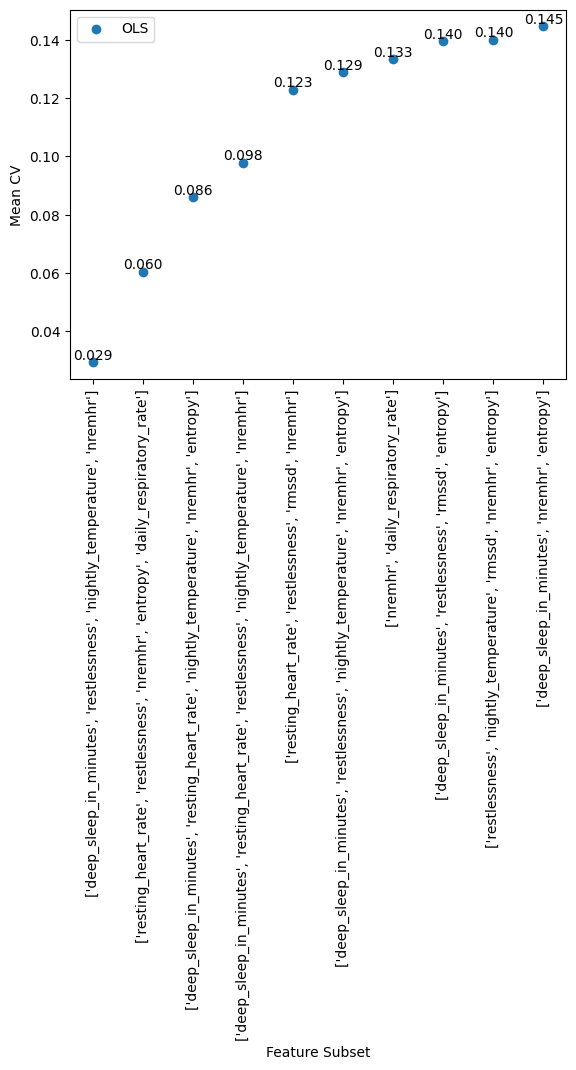

In [539]:
x_axis_values = np.arange(10)
y_axis_values = cv_df['meanCV'][:10]

plt.scatter(x_axis_values,y_axis_values,label='OLS')

for a, b in zip(x_axis_values, y_axis_values):
    plt.text(a, b, f'{b:.3f}', ha='center', va='bottom')
    
plt.xlabel('Feature Subset')
plt.ylabel('Mean CV')
plt.legend()
plt.xticks(np.arange(10),cv_df['subset'][:10],rotation=90)
plt.show()

In [540]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

scaler = StandardScaler()

In [560]:
def compute_cv_mean_ridge(X_tmp, y_tmp, alpha):
    kf = KFold(n_splits=5, shuffle=True)
    cv_list = []
    for train_ind, val_ind in kf.split(X_tmp):
        X_tr, X_val = X_tmp[train_ind], X_tmp[val_ind]
        y_tr, y_val = y_tmp[train_ind], y_tmp[val_ind]
        
        if X_tr.shape[1] == 0: #when there is only one feature, reshaping from 1D to 2D so scaler will work
            X_tr = X_tr.reshape(-1,1)
        
        if X_val.shape[1] == 0:
            X_val = X_val.reshape(-1,1)

        if X_tr.shape != (0,1): #when feature subset is [], after reshaping by (-1,1), the shape of X becomes (0, 1)
            X_tr_scaled = scaler.fit_transform(X_tr)
            X_val_scaled = scaler.fit_transform(X_val)
            model = Ridge(alpha=alpha)
            model.fit(X_tr_scaled,y_tr)
            y_val_pred = model.predict(X_val_scaled)
        else:
            y_val_pred = np.full(y_val.shape[0], np.mean(y_tr))        
        cv_list.append(np.mean(y_val-y_val_pred)**2)
    return np.mean(cv_list)

In [599]:
alpha_values = [0.01,0.1,1,10,100]

compare_alphas = {}


for alpha in alpha_values:
    
    subsets = []
    cv_dict_ridge = []
    
    for length in range(stop):
        for subset in itertools.combinations(iterable, length):       
            subset_indices = [i-1 for i in subset]
            feature_subset = [feature_list[i] for i in subset_indices]

            X = np.array(final_df.loc[:,feature_subset].values)

            cv_mean_ridge = compute_cv_mean_ridge(X, y, alpha)
            
            subsets.append(feature_subset)
            cv_dict_ridge.append(cv_mean_ridge)

    compare_alphas[alpha]=cv_dict_ridge

compare_alphas['subset']=subsets

cv_df_ridge_final = pd.DataFrame(compare_alphas)
cv_df_ridge_final

,0.01,0.1,1,10,100,subset
0,1.626134,2.774093,0.609977,2.073980,1.732426,[]
1,4.833333,0.951531,3.343821,6.414966,0.957200,[deep_sleep_in_minutes]
2,1.251984,3.117063,1.151361,1.249150,0.995465,[resting_heart_rate]
3,0.863662,2.438209,2.445295,0.719104,0.573129,[restlessness]
4,1.858560,3.376417,0.282596,0.155045,4.401077,[nightly_temperature]
...,...,...,...,...,...,...
251,5.053005,1.600624,1.106009,3.315476,4.086451,"[deep_sleep_in_minutes, resting_heart_rate, re..."
252,1.305839,1.182540,1.318594,4.701531,1.103175,"[deep_sleep_in_minutes, resting_heart_rate, ni..."
253,4.232426,1.226474,0.129535,0.310941,2.469388,"[deep_sleep_in_minutes, restlessness, nightly_..."
254,3.615930,5.536281,2.323413,1.012472,2.054138,"[resting_heart_rate, restlessness, nightly_tem..."


In [660]:
mini = {}

for col in cv_df_ridge_final.columns:
    if col == 'subset':
        continue
    mini[col]=cv_df_ridge_final[col].min()

best_lambda = list(mini.keys())[0]
minimum = mini[best_lambda]

for key, value in mini.items():
    print
    if value < minimum:
        best_lambda = key
        minimum = value
        print(f'The best lambda for Ridge Regularization is {best_lambda}.')
        

The best lambda for Ridge Regularization is 0.1.


In [663]:
cv_df_ridge_final.sort_values(best_lambda,inplace=True)
cv_df_ridge_final.reset_index(drop=True,inplace=True)
selected_Ridge_features = cv_df_ridge_final['subset'][0]
print(f'Features that are most associated with sleep score is {selected_Ridge_features}.')

Features that are most associated with sleep score is ['nremhr'].


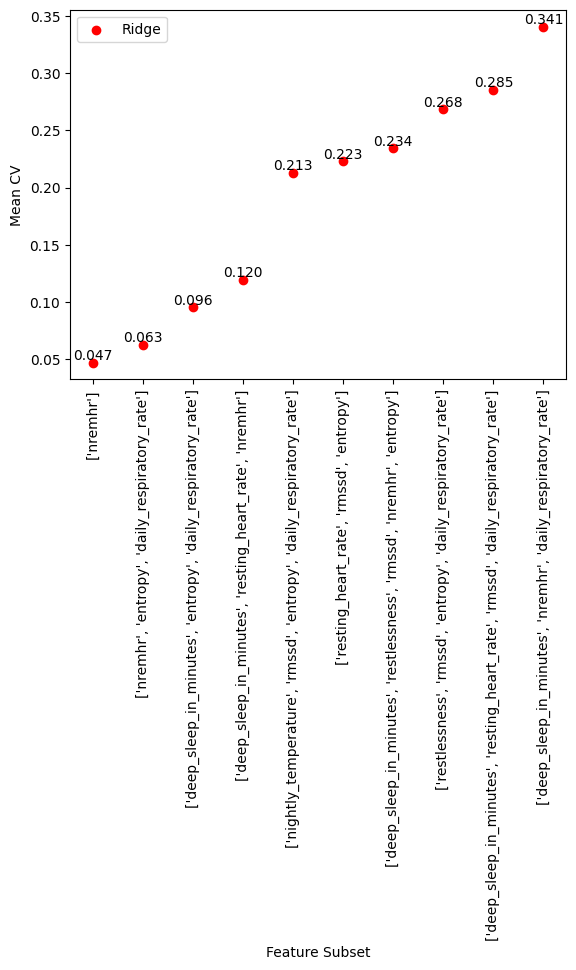

In [665]:
x_axis_values = np.arange(10)
y_axis_values = cv_df_ridge_final[best_lambda][:10]

plt.scatter(x_axis_values,y_axis_values,label='Ridge',color='red')

for a, b in zip(x_axis_values, y_axis_values):
    plt.text(a, b, f'{b:.3f}', ha='center', va='bottom')

plt.xlabel('Feature Subset')
plt.ylabel('Mean CV')
plt.legend()
plt.xticks(np.arange(10),cv_df_ridge_final['subset'][:10],rotation=90)
plt.show()